## Guide to using spectrum for data visualization

This guide will aid you in using the functionality of Plot() to visualize optical and magneto-optical spectral data, once processed using Data_macro.
<br>


### Contents:

1. Adding captions<br><br>
2. False color visualization<br><br>
3. Stacked plot visualization<br><br>
4. False color plot widget<br><br>
5. Stacked plot widget<br><br>


### Initial importing functions and processing of data:

In [1]:
#RUN THIS
from spectrum import *
import matplotlib.pyplot as plt
import os
from pathlib import Path
current_path = Path.cwd()

# Magneto-optics paths
path001 = os.path.join(current_path, "Data", "Magneto-optics", "Facet_001")
path100 = os.path.join(current_path, "Data", "Magneto-optics", "Facet_100")

# 001 data processing
data1 = Data_macro(path001, flag_txt=False, as_folder=False, col_names="B", zero_field= True)
mag_001 = data1.auto()

# 100 data processing
data2 = Data_macro(path100, flag_txt=False, as_folder=False, col_names="B", zero_field=True)
mag_100 = data2.auto()


# 1. Adding captions
We can add captions to the plot using the the method ``add_caption()``.<br>
``add_caption(ax, caption, x_frac, y_frac, color, fontsize)``<br>

-  ``ax``: (Object) Set of axes on which the caption is to be added.<br><br>
-  ``caption``: (string) Message to be displayed as a caption. <br><br>
- ``x_frac``: (float) Fractional x position of caption on graph. <br><br>
- ``y_frac``: (float) Fractional y position of caption on graph. <br><br>
- ``color``: (string) Color of caption text. <br> Default = ``"k"``<br><br>
- ``fontsize``: (float) Font size of caption text. <br> Default = ``10.0``<br><br>

# 2. False Color visualization

We can represent the data in a false-color plot using the ``false_color()`` method of the ``Plot`` class.

We can specify various paramters to alter the appearance of the plot.
<br>
``false_color(fig, ax, I_min, I_max, e_min, e_max, CB, label, units, cmap)``
<br>
- ``fig``: (object) The figure on which the data is to be plotted. <br><br>
- ``ax``: (object) The set of axes on which the data is to be plotted. <br><br>
- ``I_min``: (float) The minimum value of intensity to be displayed. <br>Default value =  ``0.9``.<br><br>
- ``I_max``:(float) The maximum value of intensity to be displayed.<br> Default value = ``1.1``.<br><br>
- ``e_min``: (float) The lower bound of the y axis. <br>Default value = ``50``.<br><br>
- ``e_max``: (float) The upper bound of the y axis. <br>Default value = ``250``.<br><br>
- ``CB`` : (Boolean) Indicates the presence of a color bar. <br>Default value = ``True``.<br><br>
- ``label`` : (Boolean) Indicates the presence of a label. <br>Default value = ``True``.<br><br>
- ``units``: (string) The units to be displayed on the y axis ``("meV", "cm-1", "THz")``.<br> Default value = ``"meV"`` <br><br>
- ``cmap`` : (string) The colormap to be used. <br> Default value = ``"Blues_r"``

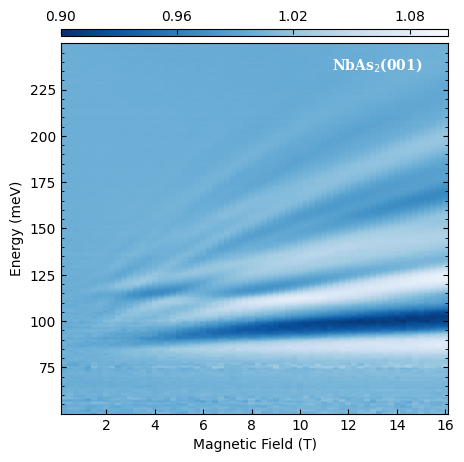

In [2]:
# Create axes
fig, ax = plt.subplots(1,1, figsize = (5,5))

# Initialize plot object with 001 data
plot1 = Plot(mag_100)

# Plot data
plot1.false_color(fig,ax, e_min = 50, e_max = 250, units = "meV",cmap = "Blues_r")

# Add caption
plot1.add_caption(ax, caption="NbAs$_2$(001)", x_frac=0.7, y_frac=0.93, color="white", fontsize=10)

# 3. Stacked Plot Visualization


We can represent the data in a stacked plot using the ``stacked_plot()`` method of the ``Plot`` class.
<br>We can specify various parameters to alter the appearance of the plot.
<br>
``stacked_plot(fig, ax, e_min, e_max, B_maj_int, B_min_int, e_maj_int, e_min_int, units, C_HL, C_Base, alpha, label, step, grad_colors, cmap, I_min, I_max, zeroT_baseline)``
<br>
- ``fig``: (object) The figure on which the data is to be plotted. <br><br>
- ``ax``: (object) The set of axes on which the data is to be plotted. <br><br>
- ``e_min``: (float) The lower bound for the x axis. <br>Default value = ``50`` <br><br>
- ``e_max``: (float) The upper bound for the x axis. <br>Default value = ``250`` <br><br>
- ``B_maj_int``: (float) The major interval for magnetic field stacks. <br> Default value = ``2``.<br><br>
- ``B_min_int``: (float) The minor interval for magnetic field stacks. <br> Default value = ``0.25``.<br><br>
- ``e_maj_int``: (float) The major interval for x axis ticks. <br> Default value = ``25``.<br><br>
- ``e_min_int``: (float) The minor interval for x axis ticks. <br> Default value = ``5``.<br><br>
- ``units``: (string) The units for the x axis. ``("meV", "cm-1", "THz")``.<br> Default value = ``"meV"`` <br><br>
- ``C_HL``: (string) The color for major interval stacks. <br> Default value = ``'#011f4b'``.<br><br>
- ``C_Base``: (string) The color for minor interval stacks. <br> Default value = ``'#005b96'``<br><br>
- ``alpha``: (float) The opacity of the plotted curves. <br> Default value = ``0.8`` <br><br>
- ``label``: (Boolean) Specifies whether the labels for the major stacked plots should be displayed. <br>
Default value = `True` <br><br>
- ``step`` : (float) Determines the spacing between successive lines on the graph. <br> Default value = 0.01<br><br>
- ``grad_colors`` : (Boolean) Specifies whether stacked plot should use a gradient color scheme. <br> Default value = False<br><br>
- ``cmap``:(str) Color map to be used if using a gradient color scheme. <br> Default value = ``'magma'``<br><br>
- ``I_min``:(float,``[0.0,1.0]``) Lower bound for color map range to be used for gradient color scheme. <br> Default value = 0.0 <br><br>
- ``I_max``:(float,``[0.0,1.0]``) Upper bound for color map range to be used for gradient color scheme. <br> Default value = 1.0 <br><br>
- ``zeroT_baseline``: (float) Specifies the y axis value for the 0T baseline value.


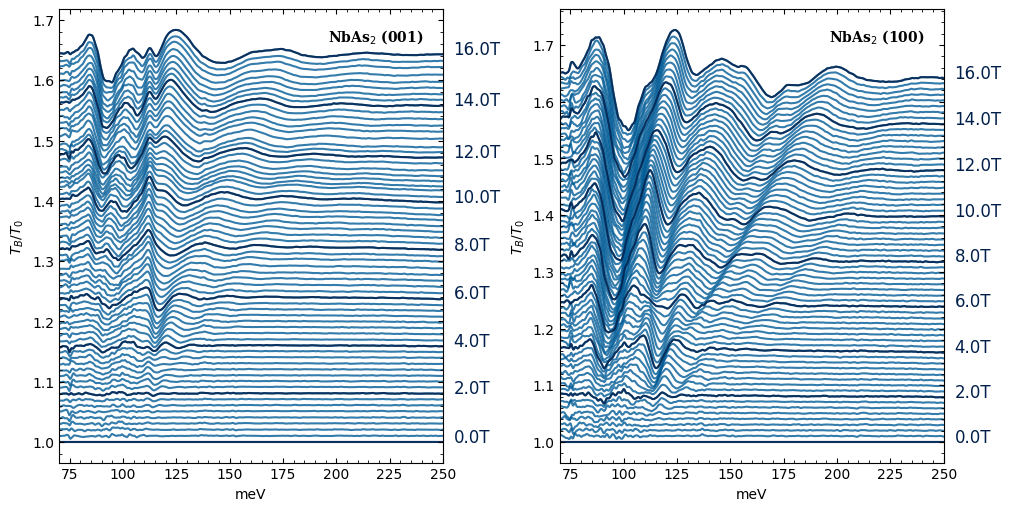

In [8]:
# Create axes
fig,axs = plt.subplots(1,2,layout="constrained",figsize=(10,5))

# 001
# Initialize plot object with 001 data
stack1 = Plot(mag_001)

# Plotting data
stack1.stacked_plot(fig,axs[0])

# 100
# Initialize plot object with 001 data
stack2 = Plot(mag_100)

# Plotting data
stack2.stacked_plot(fig,axs[1])

# Adding captions
stack1.add_caption(axs[0], caption="NbAs$_2$ (001)", x_frac=0.7, y_frac=0.93, color="black", fontsize=10)
stack2.add_caption(axs[1], caption="NbAs$_2$ (100)", x_frac=0.7, y_frac=0.93, color="black", fontsize=10)

# 4. False color widget

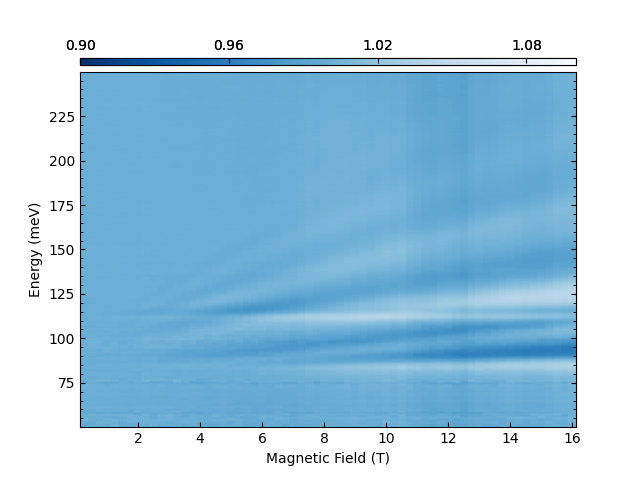

In [13]:
# False color plot
# Dropdown menu of colormaps
%matplotlib widget

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from spectrum import Plot

fig, ax = plt.subplots()
plot = Plot(mag_001)

def update_plot2(e_min_max, I_min_max,colormap):
    e_min, e_max = e_min_max
    I_min, I_max = I_min_max

    # Clear the previous content from the axis
    ax.clear()

    plot.false_color(fig, ax, e_min=e_min, e_max=e_max, units="meV", I_min = I_min, I_max = I_max, cmap = colormap)

    # Redraw the updated plot
    
    fig.canvas.draw()

# Clear the output area before displaying the new figure
def on_value_change2(e_min_max, I_min_max, colormap):
    clear_output(wait=True)
    update_plot2(e_min_max, I_min_max,colormap)

range_slider1 = widgets.IntRangeSlider(value=[50, 250], min=0, max=500, description='Energy range (meV):')
range_slider2 = widgets.FloatRangeSlider(value =[0.9,1.1], min = 0.5, max = 1.5, description = 'Intensity range:')
dropdown = widgets.Dropdown(options = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Blues_r', 'Reds_r', 'Purples_r', 'Oranges_r', 'PuRd_r', 'GnBu_r', 'PuBuGn_r'], value = 'Blues_r', description = 'Color map:')

# Use the interactive_output function to update the plot when either widget value changes
out = widgets.interactive_output(on_value_change2, {'e_min_max': range_slider1, 'I_min_max':range_slider2, 'colormap':dropdown})

# Initial update so that plot is visible before widgets are interacted with.
update_plot2([50,250],[0.9,1.1], 'Blues_r')

# Display the widgets and plot
widgets.VBox([range_slider1, range_slider2, dropdown, out])

## 5. Stacked plot widget

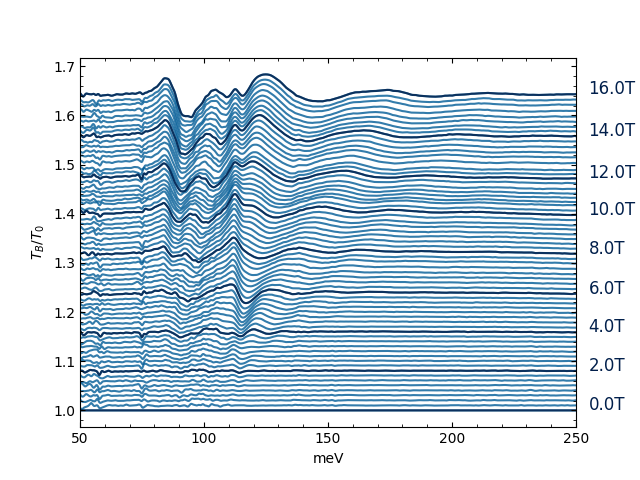

In [12]:
# Stacked plot widget
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

plot = Plot(mag_001)
fig, ax = plt.subplots()

def update_plot(e_min_max, color_hl, color_base):
    e_min, e_max = e_min_max

    # Dynamic tick spacing:
    range = e_max - e_min
    maj_int =  0.5 * 10 ** (np.ceil(np.log10(range)) - 1)
    min_int = maj_int / 5

    # Clear the previous content from the axis
    ax.clear()

    plot.stacked_plot(fig, ax, e_min=e_min, e_max=e_max, units="meV", C_HL=color_hl, C_Base=color_base, e_maj_int = maj_int, e_min_int = min_int)
    
    # Redraw the updated plot
    fig.canvas.draw()

# Clear the output area before displaying the new figure
def on_value_change(e_min_max, color_hl, color_base):
    clear_output(wait=True)
    update_plot(e_min_max, color_hl, color_base)

range_slider = widgets.IntRangeSlider(value=[50, 250], min=0, max=500, description='Energy range (meV):')
color_picker1 = widgets.ColorPicker(concise=False, description='C_HL', value='#011f4b', disabled=False)
color_picker2 = widgets.ColorPicker(concise=False, description='C_Base', value='#005b96', disabled=False)

# Use the interactive_output function to update the plot when either widget value changes
out = widgets.interactive_output(on_value_change, {'e_min_max': range_slider, 'color_hl': color_picker1, 'color_base': color_picker2})

# Initial update so that plot is visible before widgets are interacted with.
update_plot([50,250],'#011f4b', '#005b96')

# Display the widgets and plot
widgets.VBox([range_slider, color_picker1, color_picker2, out])